## Upper Confidence Bound Algorithm ##
### Solving the bandit problem: Which advertisement will provide the best return? ###
### By: William Tannous, Kx Systems ###

In [1]:
// Simulation Data Load

d:10 / Arms - num_of_advertisements in this example
sim_data:(d#"b";enl",")0:`:Ads_CTR_Optimisation.csv / Simulation Data

In [2]:
//
// @desc Performs Upper Confidence Bound Algorithm on a table of simulation rounds.
//
// @param sim_data  {table} Simulation Data.
//
// @return {dictionary} Results of the algorithm's performance on the simulation data:
//                              1. Total Reward from the simulation.
//                              2. Reward for each arm.
//                              3. List of selections made.
//                              4. Number of selections by arm.
//
ucbAlg:{[sim_data]
    truth:flip value flip sim_data; / Convert table into matrix
    
    //
    // Reset Globals
    //
    totalR::0;
    selections::();
    rewards::count[first truth]#0;
    selByArm::count[first truth]#0;
    
    selectArm:{[truth]
        round+:1;

        //
        // First i (count of arms) rounds every arm is chosen
        // 
        if[0 in selByArm;
            sel:first where 0=selByArm; / Selected arm
            selByArm[sel]+:1; / Increment selection list
            rewards[sel]+:truth sel; / Increment reward list
            totalR+:truth sel; / Increment total reward
            selections,:sel;
            :(::)];
        ub:(rewards%selByArm)+sqrt 1.5*log[round+1]%selByArm; / Upper bound
        sel:ub?max ub; / Selected arm
        selByArm[sel]+:1; / Increment selection list
        rewards[sel]+:truth sel; / Increment reward list
        totalR+:truth sel; / Increment total reward
        selections,:sel;
        }each truth;
    `totalReward`rewardsByArm`allSelections`selByArm!(totalR;rewards;selections;selByArm)
    }
res:ucbAlg sim_data
res

totalReward  | 2244
rewardsByArm | 102 50 8 51 1773 2 30 205 20 3
allSelections| 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 0 1 2 3 4 5 6 7 8 8 ..
selByArm     | 615 391 186 396 6531 151 298 1026 249 157


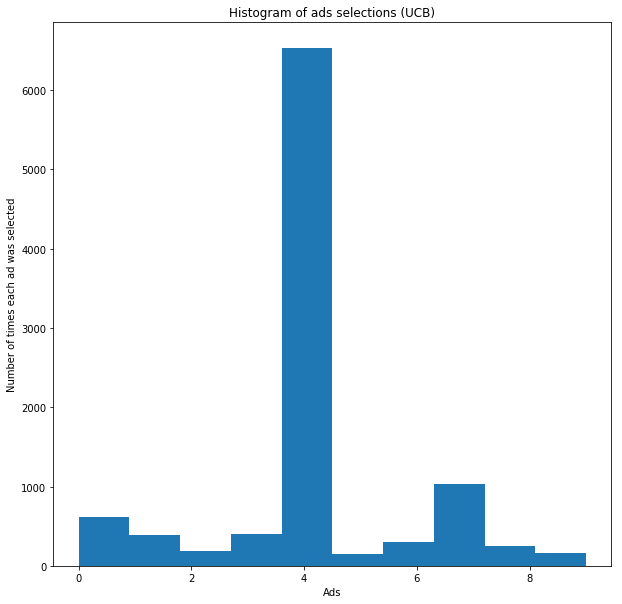

In [3]:
plt:.matplotlib.pyplot[];
plt.figure[`figsize pykw 10 10];
plt.hist(selections);
plt.title"Histogram of ads selections (UCB)";
plt.xlabel"Ads";
plt.ylabel"Number of times each ad was selected";
plt.show[];

#### From inspection of the histogram above, we see that the UCB algorithm has determined the fifth advertisement provides the best reward and therefore it was exploited more often at the end of the of the simulation #### 

In [4]:
count where 4=-2000#res`allSelections / Number of times Ad#5 was chosen in the last 2000 rounds of the simulation

1765


In [5]:
randomSel:{[sim]
    truth:flip value flip sim_data;
    rewards::count[first truth]#0;
    selByArm::count[first truth]#0;
    totalR::0;
    selections::();
    round+:1;
    {[truth]sel:rand d; / Selected arm
        selByArm[sel]+:1; / Increment selection list
        rewards[sel]+:truth sel; / Increment reward list
        totalR+:truth sel; / Increment total reward
        selections,:sel;}each truth;
    `totalReward`rewardsByArm`allSelections`selByArm!(totalR;rewards;selections;selByArm)
    }
randomSel sim_data

totalReward  | 1270
rewardsByArm | 172 140 65 139 277 6 117 209 93 52
allSelections| 8 1 9 5 4 6 6 1 8 5 4 9 2 7 0 1 9 2 1 8 8 1 7 2 4 5 4 2 7 8 5 ..
selByArm     | 1008 988 969 1054 977 986 1004 1029 977 1008


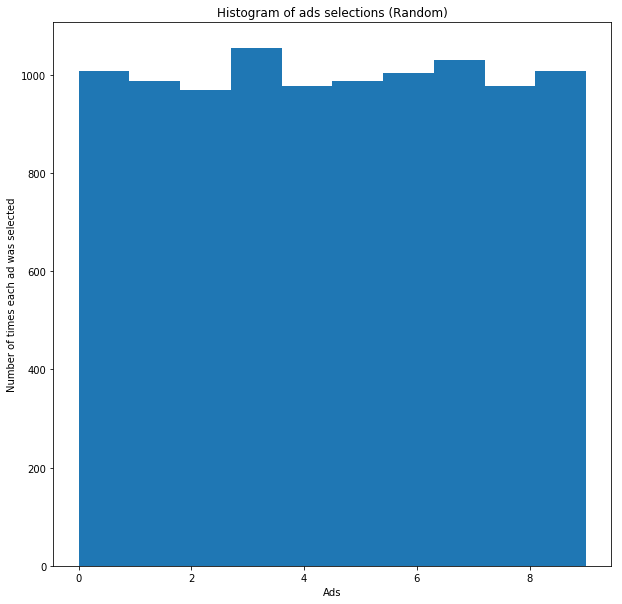

In [6]:
plt:.matplotlib.pyplot[];
plt.figure[`figsize pykw 10 10];
plt.hist(selections);
plt.title"Histogram of ads selections (Random)";
plt.xlabel"Ads";
plt.ylabel"Number of times each ad was selected";
plt.show[];

#### The Histogram above shows a nearly uniform selection distribution of the advertisements ####
#### As expected this resulted in a lower reward than employing the UCB algorithm (2244 vs. 1270)####